<a href="https://colab.research.google.com/github/josephtrill/CSST102_TRILLANA_BSCS-3A/blob/main/3a_trillana_mp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Problem No. 3: K-Nearest Neighbors (KNN) Classifier on Breast Cancer Diagnosis Dataset**

### **Data Exploration and Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
data = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

In [ ]:
# Exploratory Data Analysis (EDA)
print(data.head(10))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [ ]:
print(data.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [ ]:
data = data.drop(columns=['id', 'Unnamed: 32'])

In [ ]:
# Convert diagnosis column to numerical values
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
# Check for missing values
print(data.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


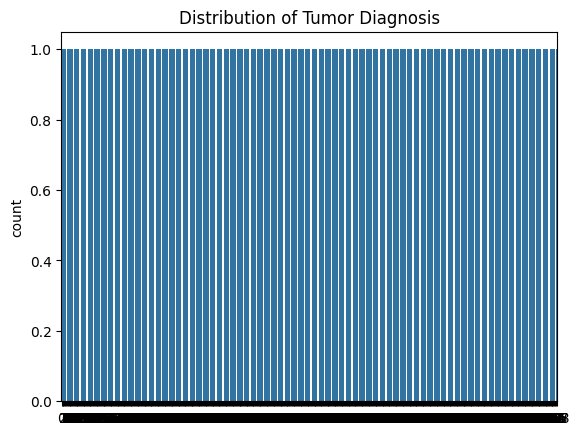

In [ ]:
# Visuals of Distribution and Relationships
sns.countplot(data['diagnosis'])
plt.title('Distribution of Tumor Diagnosis')
plt.show()

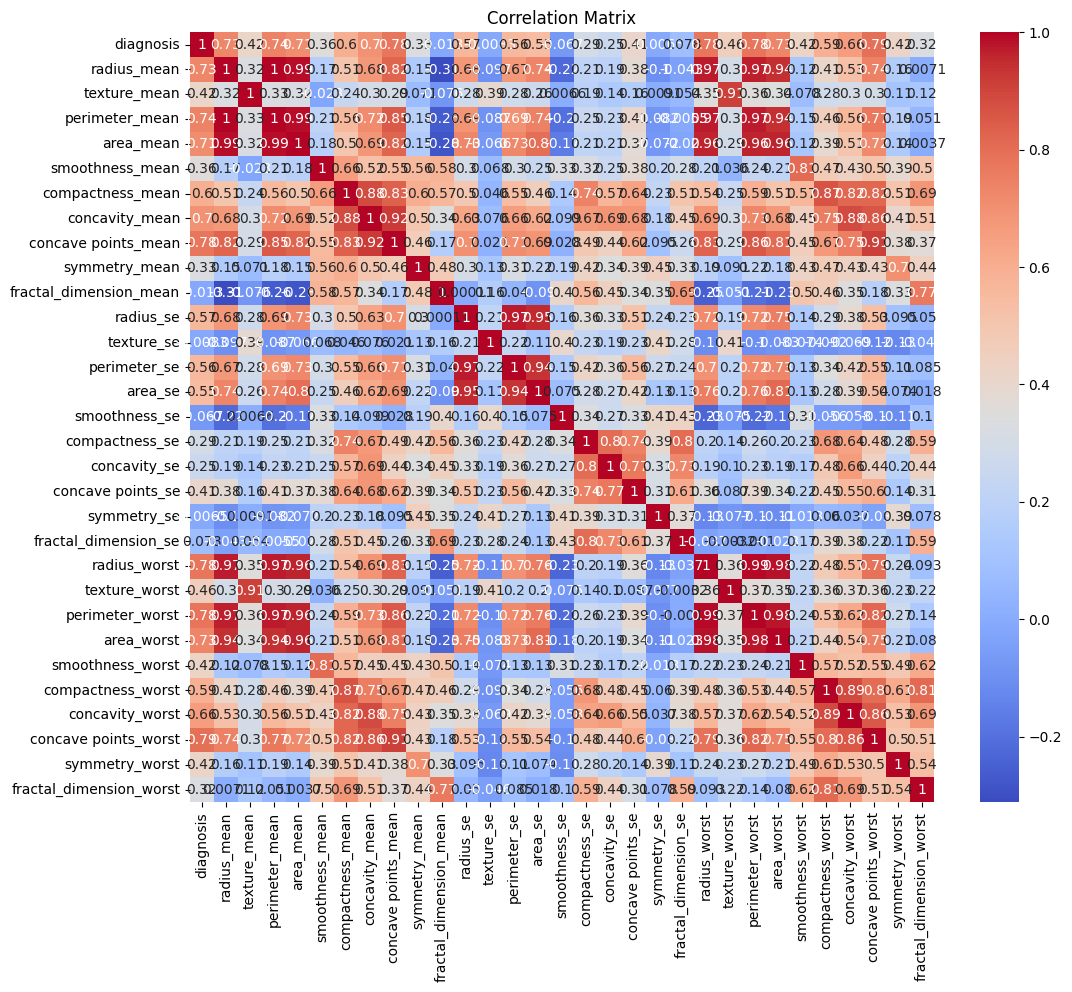

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Splitting features and labels
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [ ]:
# Normalize/Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### **2. Model Development**

In [ ]:
# K-Nearest Neighbors (KNN) Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)

### **3. Model Evaluation**

In [ ]:
# Evaluate KNN and Logistic Regression Models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("KNN Performance:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-Score: {f1_knn}\n")

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log_reg}")
print(f"Precision: {precision_log_reg}")
print(f"Recall: {recall_log_reg}")
print(f"F1-Score: {f1_log_reg}")

KNN Performance:
Accuracy: 0.9473684210526315
Precision: 0.9302325581395349
Recall: 0.9302325581395349
F1-Score: 0.9302325581395349

Logistic Regression Performance:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1-Score: 0.9647058823529412



Confusion Matrix for KNN:
 [[68  3]
 [ 3 40]]

Confusion Matrix for Logistic Regression:
 [[70  1]
 [ 2 41]]


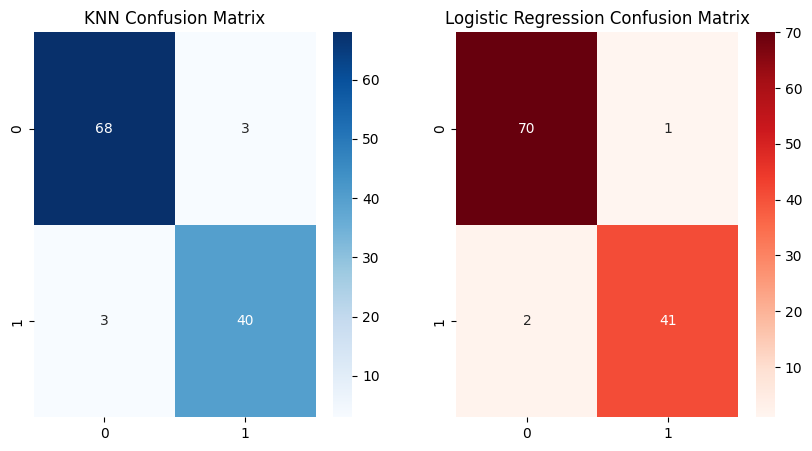

In [ ]:
# Confusion Matrix for KNN and LOgistic Regression Models
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix for KNN:\n", cm_knn)

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("\nConfusion Matrix for Logistic Regression:\n", cm_log_reg)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Reds')
plt.title('Logistic Regression Confusion Matrix')

plt.show()

### **4. Report and Visualizations**

<ipython-input-21-9d9a7b5bc047>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


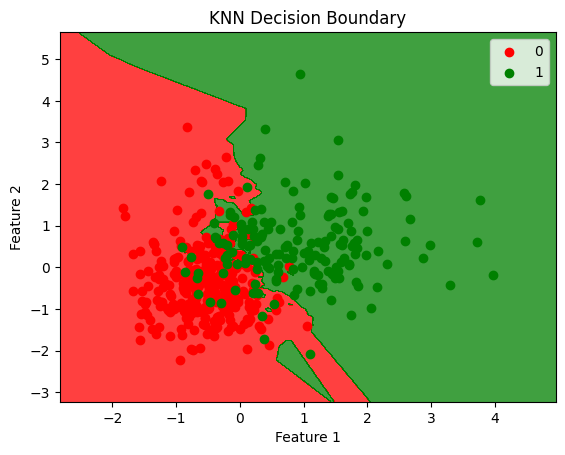

<ipython-input-21-9d9a7b5bc047>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


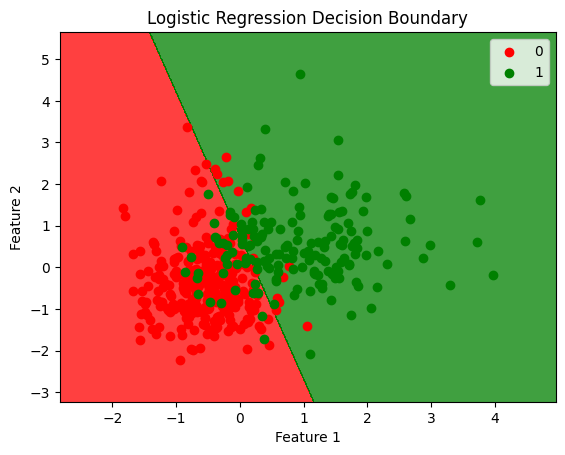

In [ ]:
#  Decision Boundaries Visualization
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def plot_decision_boundary(X, y, classifier, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

X_train_2d = X_train[:, :2]  # First two features for training
X_test_2d = X_test[:, :2]    # First two features for testing

knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_2d, y_train)

log_reg_2d = LogisticRegression(max_iter=1000)
log_reg_2d.fit(X_train_2d, y_train)

plot_decision_boundary(X_train_2d, y_train, knn_2d, title="KNN Decision Boundary")

plot_decision_boundary(X_train_2d, y_train, log_reg_2d, title="Logistic Regression Decision Boundary")

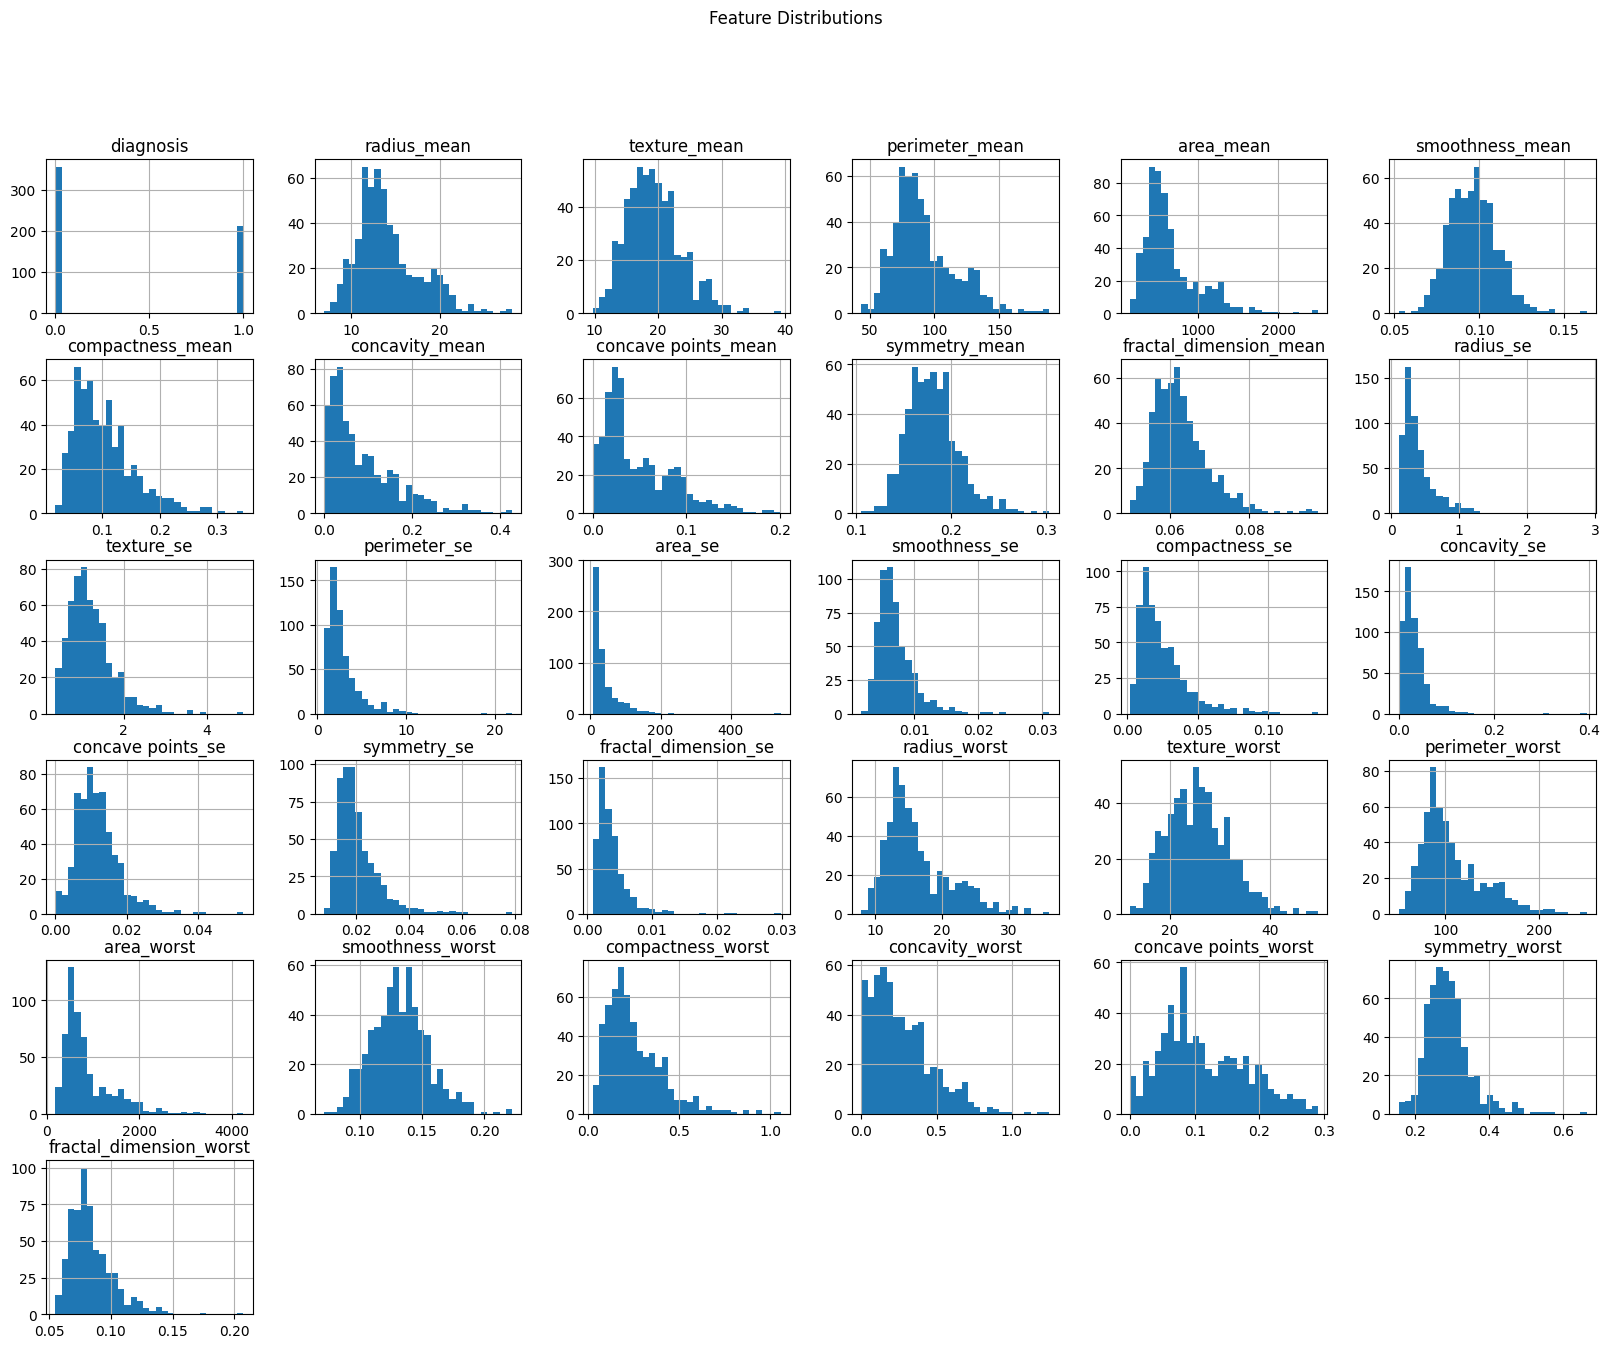

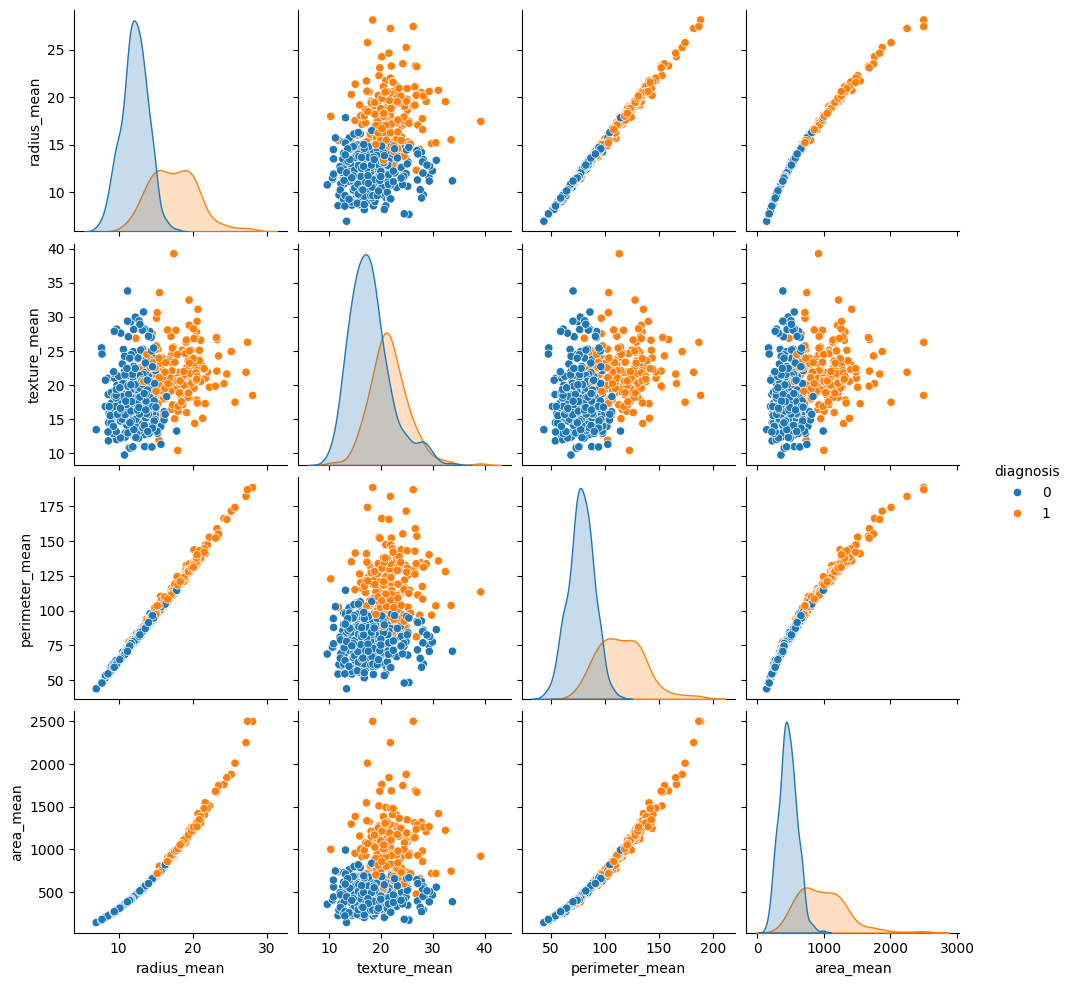

In [ ]:
# Data Distribution Visualization
data.hist(bins=30, figsize=(20, 15))
plt.suptitle('Feature Distributions')
plt.show()

sns.pairplot(data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']], hue='diagnosis')
plt.show()